In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)

In [3]:
size = 1000

# Data 1

Straight-forward linear regression

In [4]:
df1 = pd.DataFrame(data = {'x': np.random.normal(3, 1, size)})

In [5]:
df1['y'] = df1['x'] + np.random.normal(size=size)

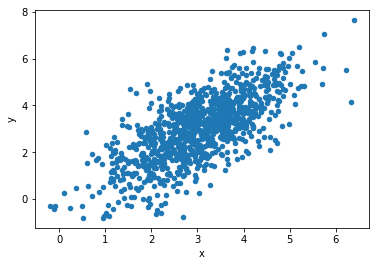

In [6]:
# Inspect
df1.plot('x', 'y', kind='scatter')

In [7]:
# Write out
df1.to_csv('df1.csv', index=False)

# Data 2

Linear regression with elbow change in slope

In [8]:
df2 = pd.DataFrame(data = {'x': np.random.normal(3, 1, size)})

In [9]:
df2['y'] = (
    df2['x'] -
    (df2['x'] > 3) * (df2['x'] - 3) +
    np.random.normal(0, .33, size=size)
)

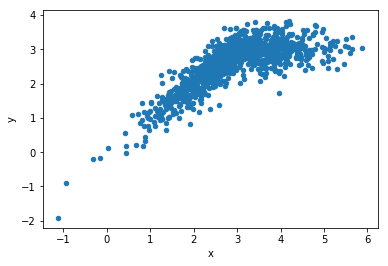

In [10]:
# Inspect
df2.plot('x', 'y', kind='scatter')

In [11]:
# Write out
df2.to_csv('df2.csv', index=False)

# Data 3

Linear regression with discontinuity but same slope

In [12]:
df3 = pd.DataFrame(data = {'x': np.random.normal(3, 1, size)})

In [13]:
df3['y'] = (
    df3['x'] +
    (df3['x'] > 3) * 3 +
    np.random.normal(size=size)
)

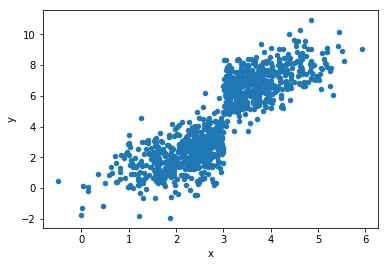

In [14]:
# Inspect
df3.plot('x', 'y', kind='scatter')

In [15]:
# Write out
df3.to_csv('df3.csv', index=False)

# Data 4

Linear regression of a categorical variable

In [16]:
df4 = pd.DataFrame(data = {'x': np.random.choice(['A', 'B'], size, p=[.5, .5])})

In [17]:
df4['y'] = (
    (df4['x'] == 'A') * 0 +
    (df4['x'] == 'B') * 3 +
    np.random.normal(size=size)
)

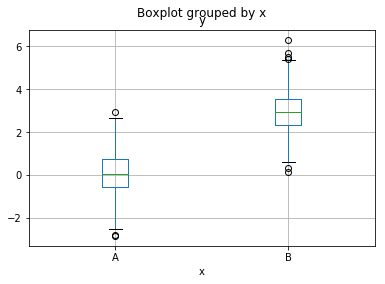

In [18]:
# Inspect
df4.boxplot('y', by='x')

In [19]:
# Write out
df4.to_csv('df4.csv', index=False)

# Data 5

Linear regression of two categorical variables with interaction effects

In [20]:
df5 = pd.DataFrame(data = {
    'x1': np.random.choice(['A1', 'A2'], size, p=[.5, .5]),
    'x2': np.random.choice(['B1', 'B2'], size, p=[.5, .5])
})

In [21]:
df5['y'] = (
    (df5['x1'] == 'A1') * 0 +
    (df5['x1'] == 'A2') * 1 +
    (df5['x2'] == 'B1') * 1 +
    (df5['x2'] == 'B2') * 0 +
    (df5['x1'] == 'A2') * (df5['x2'] == 'B1') * 3 +
    np.random.normal(size=size)
)

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


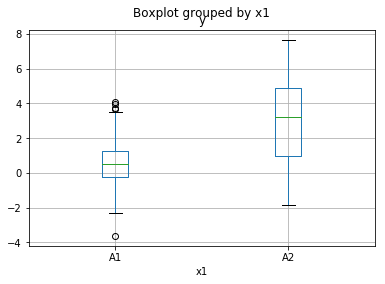

In [22]:
# Inspect x1
df5.boxplot('y', by='x1')

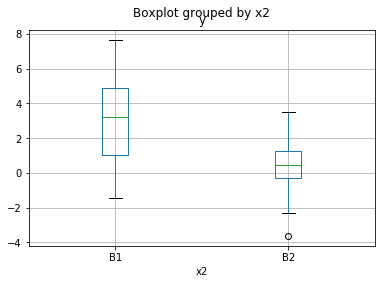

In [23]:
# Inspect x2
df5.boxplot('y', by='x2')

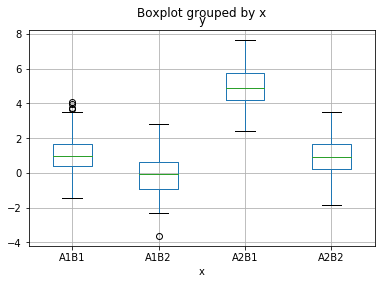

In [24]:
# Inspect interraction
tmp = df5.copy()
tmp['x'] = tmp['x1'] + tmp['x2']
tmp.boxplot('y', by='x')
del tmp

In [25]:
# Write out
df5.to_csv('df5.csv', index=False)